In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = {'materials':['Brick','Concrete','Asbestos','POP','Soil'],
'Porosity':[0.22,0.17,0.15,0.45,0.37],
'Radium_Content':[51,59,92,42,54],
'Density':[1900,2200,2250,1350,1500],
'Emanation_Coefficient':[0.18,0.24,0.53,0.11,0.23]}

In [6]:
df = pd.DataFrame(df)
decay_constant = [2.1e-6]
df['Emanation_rate'] = 1/df['Porosity'] * df['Radium_Content'] * df['Emanation_Coefficient'] * decay_constant

df['diffusion_coefficient'] = [2.5e-3,3.1e-3,1.5e-3,2.05e-3,3.9e-3]

df

,materials,Porosity,Radium_Content,Density,Emanation_Coefficient,Emanation_rate,diffusion_coefficient
0,Brick,0.22,51,1900,0.18,0.000088,0.00250
1,Concrete,0.17,59,2200,0.24,0.000175,0.00310
2,Asbestos,0.15,92,2250,0.53,0.000683,0.00150
3,POP,0.45,42,1350,0.11,0.000022,0.00205
4,Soil,0.37,54,1500,0.23,0.000070,0.00390


df.to_csv('table2.csv',index=False)

In [11]:
ventilation_rates = [9.72e-5, 1.25e-4, 1.56e-4, 1.72e-4, 1.86e-4]
volumes = [70.875,87.5,105.875,126,147.875]

def materials(df, lst):
    global ventilation_rates, volumes
    
    df_materials = df[df['materials'].isin(lst)]
    er, dc = df_materials['Emanation_rate'].sum(), df_materials['diffusion_coefficient'].sum()
    
    concs = ['conc1', 'conc2', 'conc3', 'conc4', 'conc5']
    df_conc = pd.DataFrame({'volume': volumes})
    
    for vr, conc in zip(ventilation_rates, concs):
        df_conc[str(conc)] = (er/vr) * (1 - np.exp(-vr * df_conc['volume'] / (2 * dc)))

    
    return df_materials, er, dc, df_conc

In [12]:
df1, er1, dc1, df_conc1 = materials(df,['Brick','Concrete','Asbestos','Soil'])

In [13]:
df1

,materials,Porosity,Radium_Content,Density,Emanation_Coefficient,Emanation_rate,diffusion_coefficient
0,Brick,0.22,51,1900,0.18,0.000088,0.0025
1,Concrete,0.17,59,2200,0.24,0.000175,0.0031
2,Asbestos,0.15,92,2250,0.53,0.000683,0.0015
4,Soil,0.37,54,1500,0.23,0.000070,0.0039


In [14]:
er1

0.0010156768116779881

In [15]:
dc1

0.011

In [16]:
ventilation_rates

[9.72e-05, 0.000125, 0.000156, 0.000172, 0.000186]

In [17]:
df_conc1

,volume,conc1,conc2,conc3,conc4,conc5
0,70.875,2.809323,2.693466,2.571909,2.512139,2.461421
1,87.500,3.350386,3.183081,3.009919,2.925688,2.854694
2,105.875,3.903935,3.673055,3.437595,3.324384,3.229653
3,126.000,4.460803,4.154138,3.846293,3.700103,3.578711
4,147.875,5.012493,4.618285,4.229127,4.046723,3.896470


In [47]:
df_conc1.to_excel('df_conc1.xlsx',index=False)

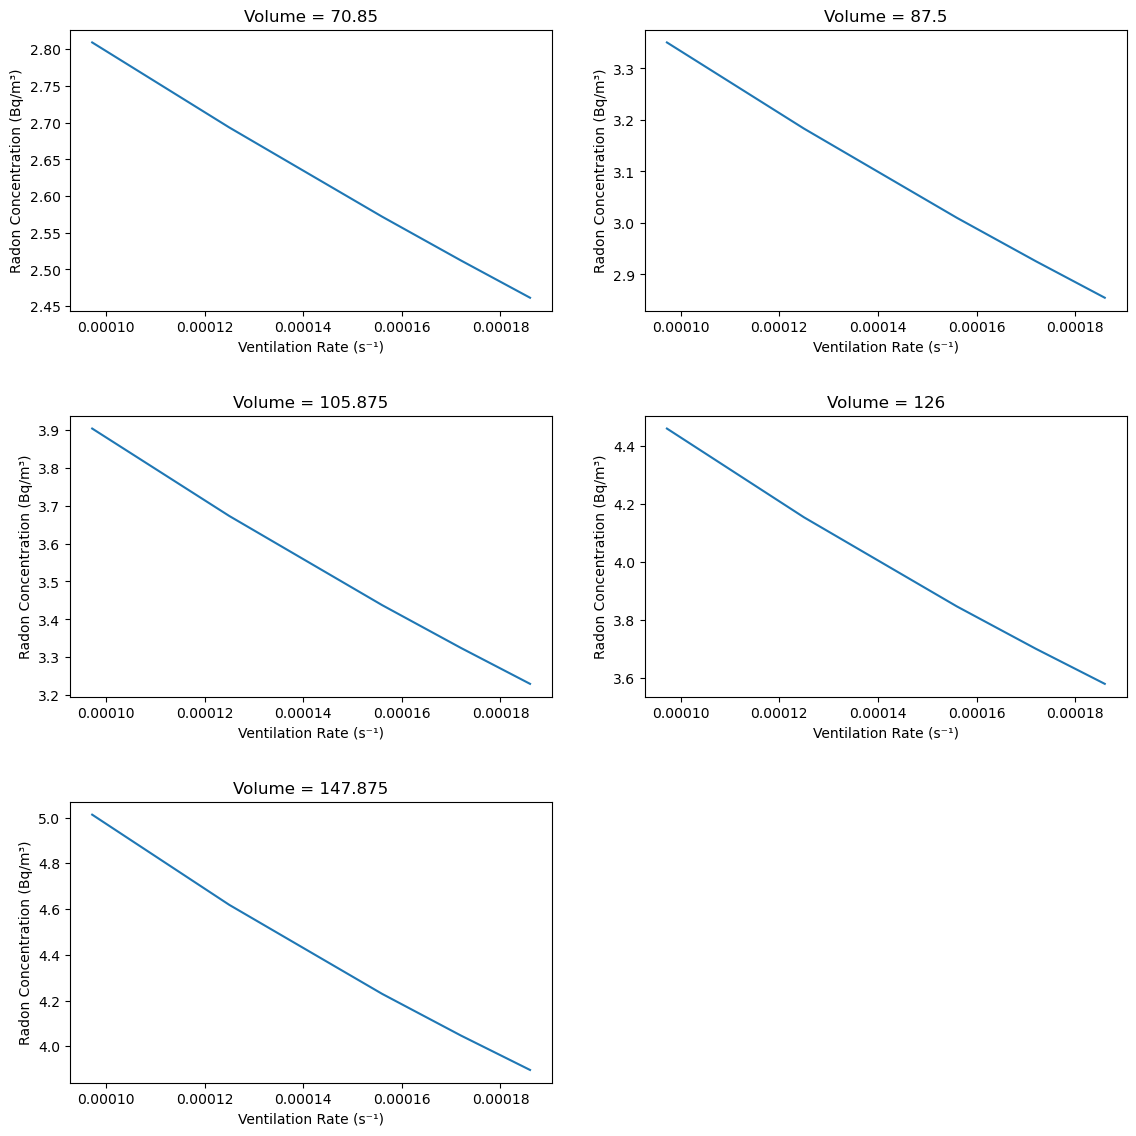

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

volumes = [70.85, 87.5, 105.875, 126, 147.875]

for i, ax in enumerate(axes.flat[:-1]):
    volume = volumes[i]
    ax.plot(ventilation_rates, df_conc1.iloc[i, 1:])
    ax.set_title(f'Volume = {volume}')
    ax.set_ylabel("Radon Concentration (Bq/m³)")
    ax.set_xlabel("Ventilation Rate (s⁻¹)")

# Remove the last subplot
fig.delaxes(axes[2, 1])

# Adjust layout to increase spacing
plt.tight_layout(pad=3.0)
plt.show()


df_conc1.to_csv('table1.csv',index=False)

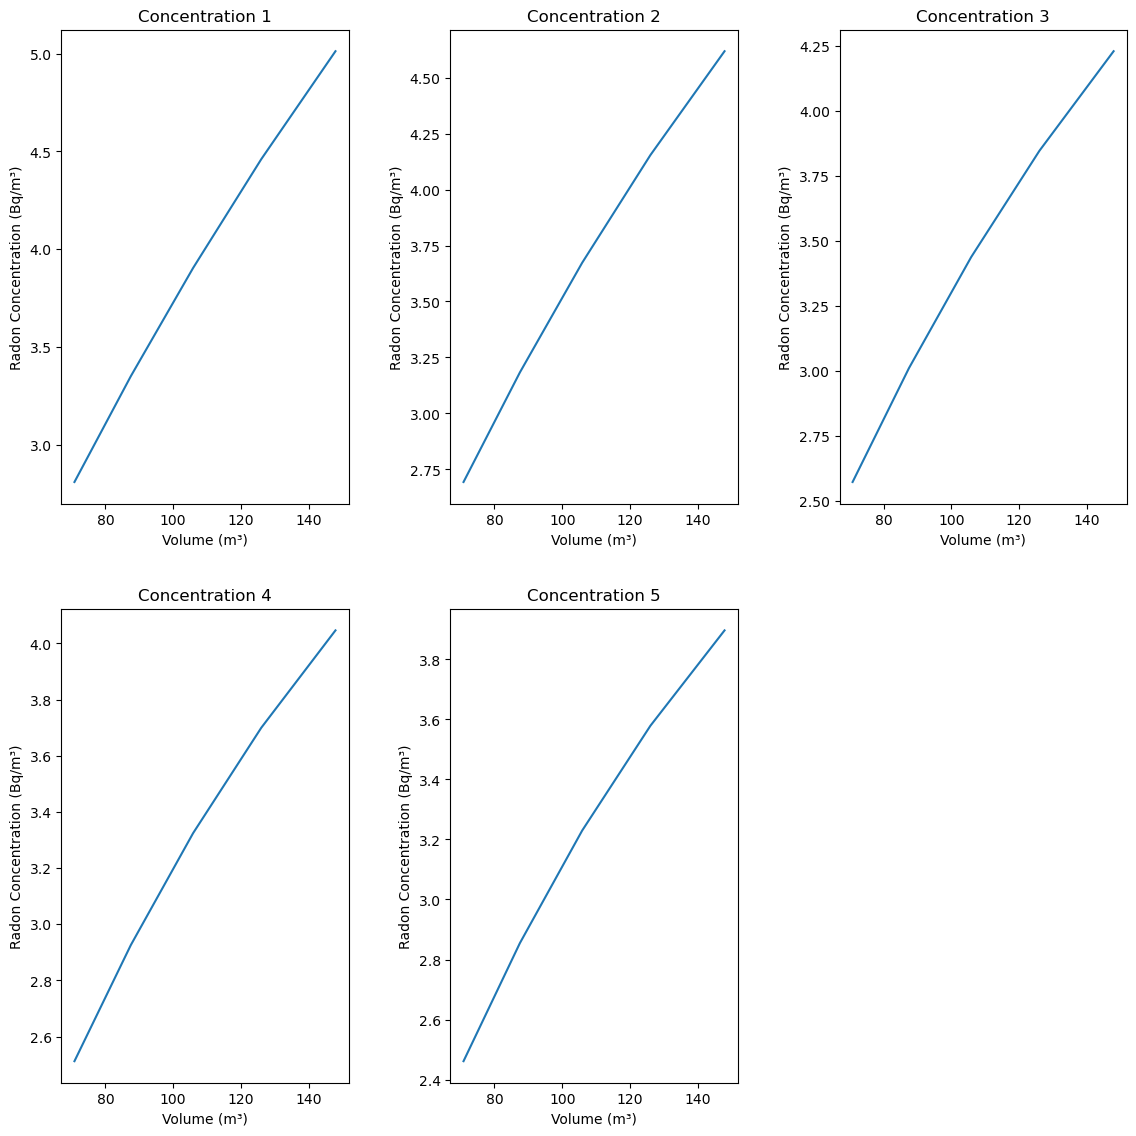

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 12))

concs = ['conc1', 'conc2', 'conc3', 'conc4', 'conc5']

for i, ax in enumerate(axes.flat):
    if i < len(concs):  # Check if the index is within the range of concs
        conc = concs[i]
        ax.plot(df_conc1['volume'], df_conc1[conc])
        ax.set_title(f'Concentration {i + 1}')
        ax.set_ylabel("Radon Concentration (Bq/m³)")
        ax.set_xlabel("Volume (m³)")
    else:
        fig.delaxes(ax)  # Remove any extra subplots beyond the length of concs

# Adjust layout to increase spacing
plt.tight_layout(pad=3.0)
plt.show()


In [41]:
df2, er2, dc2, df_conc2 = materials(df,['Brick','Concrete','POP','Soil'])

In [42]:
df2

,materials,Porosity,Radium_Content,Density,Emanation_Coefficient,Emanation_rate,diffusion_coefficient
0,Brick,0.22,51,1900,0.18,0.000088,0.00250
1,Concrete,0.17,59,2200,0.24,0.000175,0.00310
3,POP,0.45,42,1350,0.11,0.000022,0.00205
4,Soil,0.37,54,1500,0.23,0.000070,0.00390


In [43]:
print('emanation rate',er2)
print('diffusion coefficient',dc2)

emanation rate 0.0003545968116779881
diffusion coefficient 0.011550000000000001


In [44]:
df_conc2

,volume,conc1,conc2,conc3,conc4,conc5
0,70.850,0.940445,0.903374,0.864370,0.845148,0.828815
1,87.500,1.123651,1.069952,1.014184,0.986984,0.964021
2,105.875,1.311483,1.237179,1.161095,1.124398,1.093630
3,126.000,1.501207,1.402227,1.302401,1.254822,1.215224
4,147.875,1.689998,1.562371,1.435705,1.376087,1.326852


In [48]:
df_conc2.to_excel('df_conc2.xlsx',index=False)

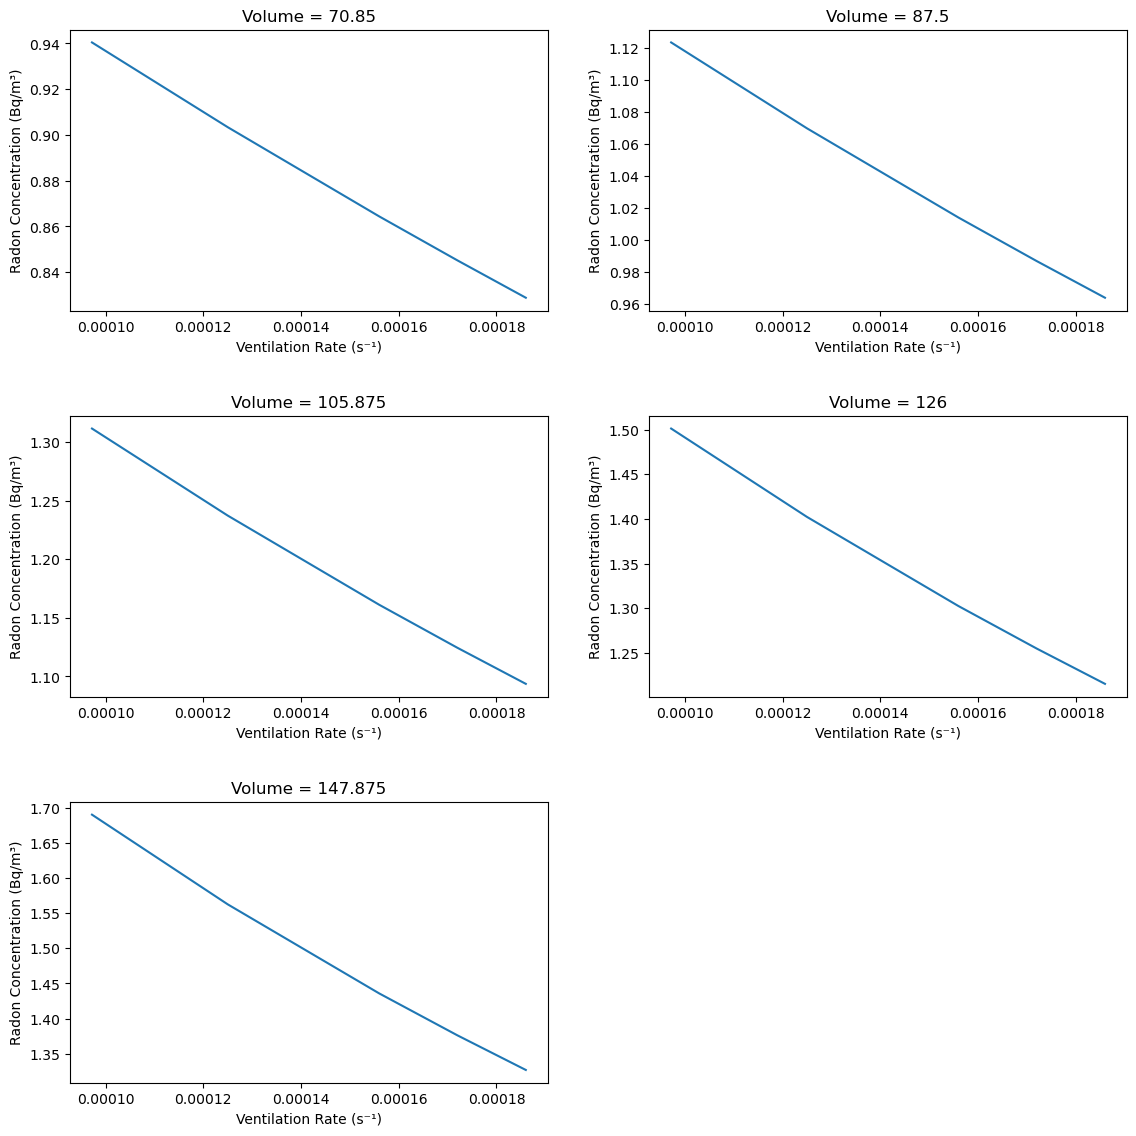

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

volumes = [70.85, 87.5, 105.875, 126, 147.875]

for i, ax in enumerate(axes.flat[:-1]):
    volume = volumes[i]
    ax.plot(ventilation_rates, df_conc2.iloc[i, 1:])
    ax.set_title(f'Volume = {volume}')
    ax.set_ylabel("Radon Concentration (Bq/m³)")
    ax.set_xlabel("Ventilation Rate (s⁻¹)")

# Remove the last subplot
fig.delaxes(axes[2, 1])

# Adjust layout to increase spacing
plt.tight_layout(pad=3.0)
plt.show()

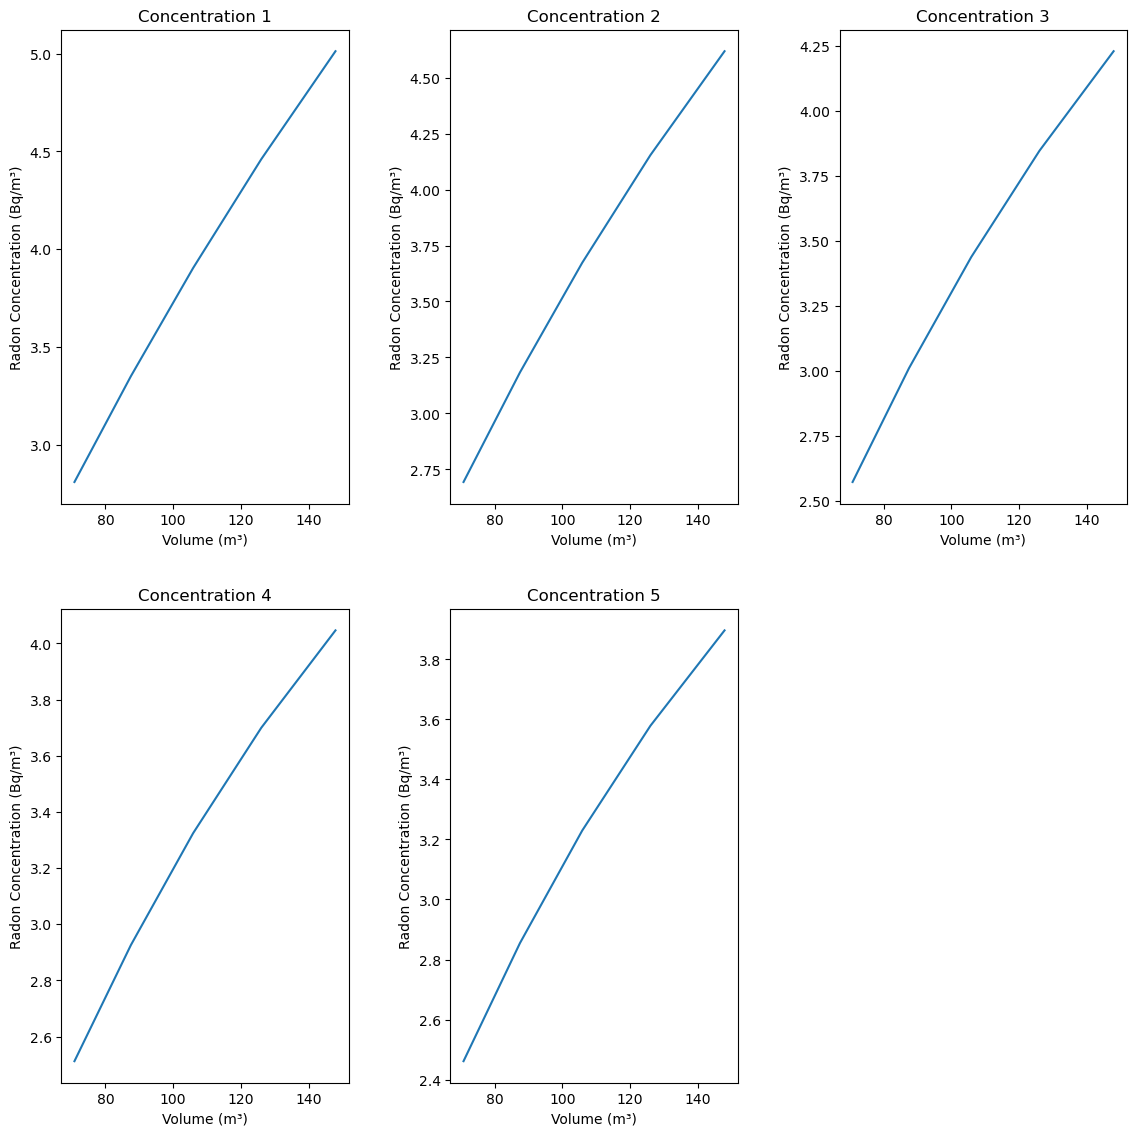

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 12))

concs = ['conc1', 'conc2', 'conc3', 'conc4', 'conc5']

for i, ax in enumerate(axes.flat):
    if i < len(concs):  # Check if the index is within the range of concs
        conc = concs[i]
        ax.plot(df_conc2['volume'], df_conc1[conc])
        ax.set_title(f'Concentration {i + 1}')
        ax.set_ylabel("Radon Concentration (Bq/m³)")
        ax.set_xlabel("Volume (m³)")
    else:
        fig.delaxes(ax)  # Remove any extra subplots beyond the length of concs

# Adjust layout to increase spacing
plt.tight_layout(pad=3.0)
plt.show()
